# What is Simple Linear Regression?
In statistics, simple linear regression is a linear regression model with a single explanatory variable. In simple linear regression, we predict scores on one variable based on results on another. The criteria variable Y is the variable we are predicting. Predictor variable X is the variable using which we are making our predictions. The prediction approach is known as simple regression as there is only one predictor variable

# Problem Statement
You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (deg C). You decide that a Linear Regression model might be a good candidate to solve this problem.
Data set:

* Independant variable X: Outside Air Temperature
* Dependant variable Y: Overall daily revenue generated in dollars

# 1. Importing Libraries
What is Simple Linear Regression?
In statistics, simple linear regression is a linear regression model with a single explanatory variable. In simple linear regression, we predict scores on one variable based on results on another. The criteria variable Y is the variable we are predicting. Predictor variable X is the variable using which we are making our predictions. The prediction approach is known as simple regression as there is only one predictor variable

In [10]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Loading datasets
Upload dataset to your notebook folder and read it into the pandas dataframe.

You can download dataset here: https://www.kaggle.com/code/brianlaurenszzz/revenue-ice-cream-simple-linear-regression/input

In [11]:
df = pd.read_csv('/content/drive/MyDrive/My ML Use Case and Hands on/1. Simple Linear Regression/IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# 3. Exprolatory Data Analysis
Now that we have our data ready, let's analyze and understand its trend in detail.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [13]:
df.shape

(500, 2)

In [14]:
#showing the entire datasets
#df.style

In [15]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Here, we can see Revenue ranges from 10.00 to 1000.00 and a median of 529.36.

# 4. Data Visualisation

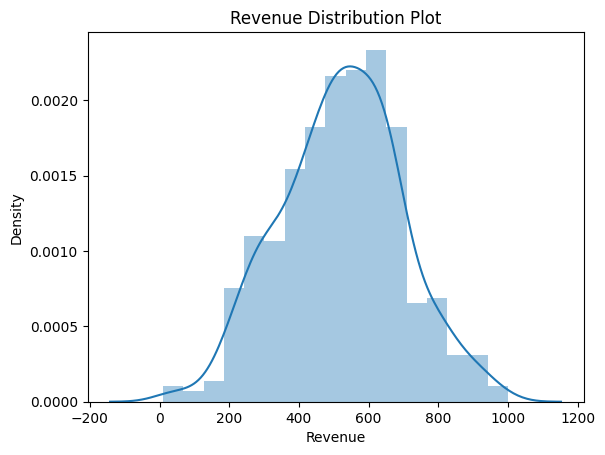

In [16]:
# Data distribution
plt.title('Revenue Distribution Plot')
sn.distplot(df['Revenue']);

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A distplot or distribution plot shows the variation in the data distribution.
It represents the data by combining a line with a histogram.

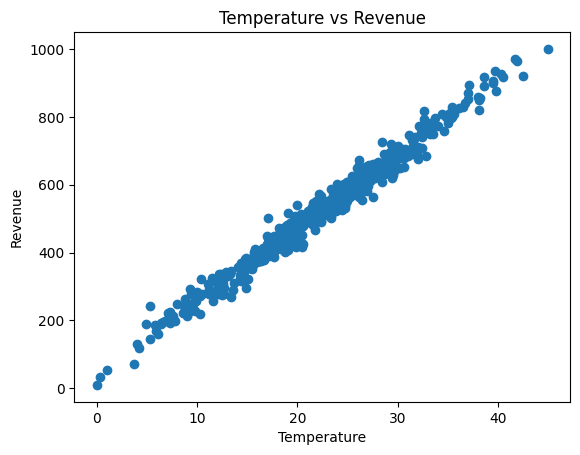

In [18]:
plt.scatter(data=df, x = 'Temperature', y = 'Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature vs Revenue');

It is clearly visible now, our data varies linearly. That means, that Revenue increases as Temperature increases.

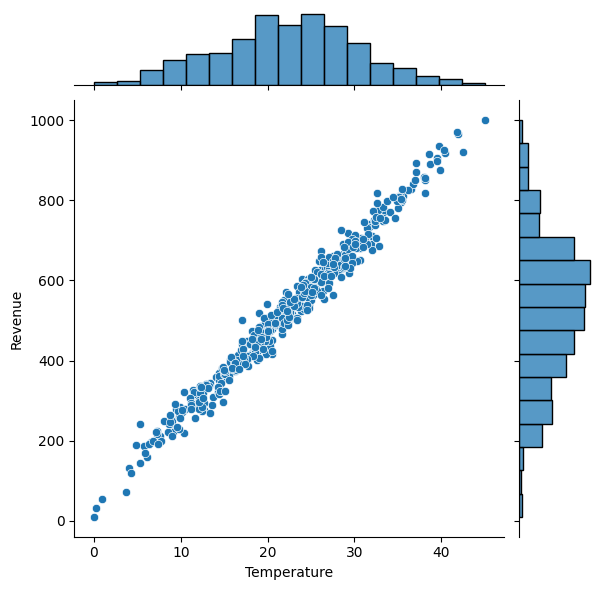

In [19]:
sn.jointplot(x='Temperature', y='Revenue', data = df);

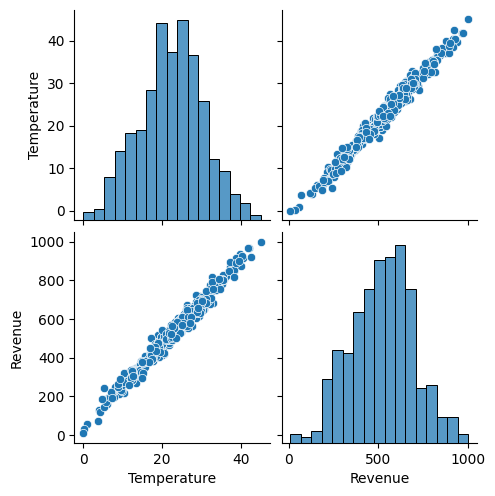

In [20]:
sn.pairplot(df)

# 5. Split the dataset into dependent/independent variables
Temperature (X) is the independent variable
Revenue (y) is dependent on experience

In [21]:
#X = df.iloc[:,0]
#y = df.iloc[:,1]
y = df['Revenue']
X = df[['Temperature']]

In [22]:
X.head()

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498


In [23]:
y.head()

0    534.799028
1    625.190122
2    660.632289
3    487.706960
4    316.240194
Name: Revenue, dtype: float64

# 6. Spliting data Training and Testing set
Further, split your data into training (80%) and test (20%) sets using train_test_split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [25]:
#print(X_train.shape)

In [26]:
#X_train = X_train.values.reshape(-1, 1)

In [27]:
print(X_train.shape)
print(y_train.shape)

(375, 1)
(375,)


# 7. Training the model
Pass the X_train and y_train data into the regressor model by SLR.fit to train the model with our training data.

In [28]:
#instatiation of an object out of our class
#when "fit_intercept = True" - asking the model to obtain intercept which is value of 'm' and 'b'
#when "fit_intercept = False" - model will obtain only the 'm' value; 'b' will be zero by default
from sklearn.linear_model import LinearRegression
SLR = LinearRegression(fit_intercept =True)
model = SLR.fit(X_train,y_train)

In [29]:
print('Linear Model Coefficient (m): ', SLR.coef_)
print('Linear Model Coefficient (b): ', SLR.intercept_)

Linear Model Coefficient (m):  [21.38947461]
Linear Model Coefficient (b):  46.81152450950458


In [30]:
y_predict = model.predict( X_test)
y_predict

array([ 689.09910497,  593.33826885,  702.08464795,  296.9515411 ,
        442.69562918,  547.4804532 ,  452.74078418,  372.59867889,
        435.00807982,  697.64600556,  441.23304343,  746.59771824,
        592.1709186 ,  470.69828016,  502.0205267 ,  695.56138373,
        635.91959901,  378.80102227,  740.0281933 ,  676.31613572,
        628.35962161,  585.64285972,  309.28105627,  539.97181931,
        186.7524701 ,  559.83039104,  808.8955106 ,  540.64452256,
        800.08978688,  505.07155921,  758.03078278,  741.22019043,
        457.38144716,  627.09539072,  307.53676986,  718.71114986,
        796.15874924,  292.86529523,  873.06259674,  682.16839329,
        586.42035065,  589.68574377,  614.27896534,  542.04206977,
        659.60268752,  943.55340789,  423.01756022,  486.64360816,
        431.75821588,  352.40713934,  655.54619269,  383.78025347,
        353.80425576,  510.53313162,  459.17218339,  764.45874341,
        698.26518144,  172.12078351,  956.19103545,  446.97599

# 8. Predict the result
Here comes the interesting part, when we are all set and ready to predict any value of y (Salary) dependent on X (Experience) with the trained model using regressor.predict

In [31]:
print(X_test.shape)
print(X_train.shape)

(125, 1)
(375, 1)


In [32]:
# Prediction result
y_pred_test = model.predict(X_test)     # predicted value of y_test
y_pred_train = model.predict(X_train)   # predicted value of y_train

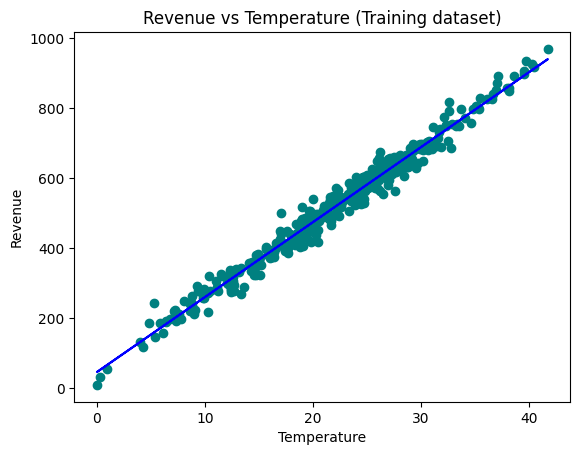

In [33]:
#VISUALIZE TRAIN SET RESULTS
plt.scatter(X_train, y_train, color = 'Teal')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Revenue vs Temperature (Training dataset)');

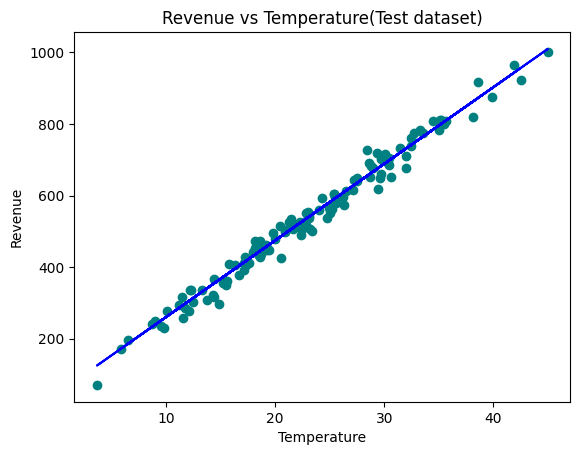

In [34]:
#VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'Teal')
plt.plot(X_test, y_pred_test, color = 'blue')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Revenue vs Temperature(Test dataset)');


In [35]:
y_predict = SLR.predict(np.array(30).reshape(-1, 1))
y_predict

array([688.49576286])